# Assignment 1
02805 Social graphs and interactions
<br>Spring 2021

# 1 Binning degree distributions

In [1]:
# Imports
import random 
from matplotlib import pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set()
import numpy as np
import networkx as nx
from random import choice
import collections
from collections import Counter 

## 1.1 Binning real numbers 

The `random` library is used to generate 5000 points from a Gaussian distribution with $\mu = 2$ and $\sigma = 0.125$.

In [2]:
# Parameters
mu = 2
sigma = 0.125

# Initialize list 
data = [] 

# Generate 500 random data points
for i in range(5000):  
    data.append(random.gauss(mu, sigma))

`numpy.histogram` is used to bin the generated numbers into 10 bins. 

In [3]:
# Save to two arrays
hist, bins = np.histogram(data, bins = 10)

print("Number of values:", len(hist))
print("Number of bin edges:", len(bins))

Number of values: 10
Number of bin edges: 11


The `numpy.histogram` function returns two arrays, `hist` containing the values of the histogram (number of observations in each bin), and `bins` which corresponds to the edges of the bins. The arrays do not have the same length, the length of `bins` equals the length of `hist`$+1$. This makes sense, as there is a starting bin edge, then a hist, then a bin edge, then a hist and so on, ending with a bin edge (bin edge starts and finishes the sequense, hence is 1 unit longer than hist).  

`matplotlib.pyplot.plot` is used to plot the binned data. To avoid the problem of the count- and bin-arrays having different lengths, the original data is used as input to `plt.hist`, together with the previously found bin edges. `plt.hist` now figures out how many values to put in each bin from the defined edges.  

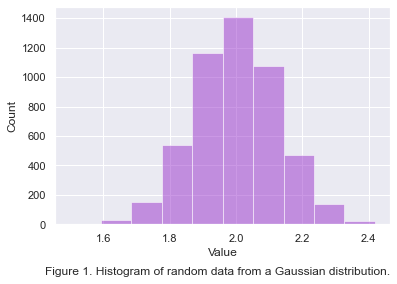

In [4]:
n = 1

plt.hist(data, bins = bins, color = "#9932CC", alpha = 0.5) 
plt.xlabel('Value')
plt.ylabel('Count')
txt = f"Figure {n}. Histogram of random data from a Gaussian distribution."
plt.figtext(0.5, -0.05, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)

plt.show()

## 1.2 Binning integers 

`numpy.random.poisson` is used to generate 5000 numbers drawn from a Poisson distribution characterized by $\lambda = 10$. 

In [5]:
data = np.random.poisson(lam = 10, size = 5000)

The maximum and minimum values of above data are 

In [6]:
min_val = np.min(data) 
max_val = np.max(data)

print("Minimum value:", min_val)
print("Maximum value:", max_val)

Minimum value: 1
Maximum value: 29


A vector $v$ that results in a binning that puts each integer value in its own bin is created. For the first bin to contain the minimum value, and the last bin to contain the maximum value found above, the last entry in v has to be $max\_val + 1 $. 

In [7]:
# range() does not include last value - additional 1 is added to max_val 
v = range(min_val, max_val + 2) 

$v$ is used as `numpy.histogram`'s `bin` parameter.

In [8]:
hist, bins = np.histogram(data, bins = v) 

The sum over bin counts is 

In [9]:
sum(hist)

5000

In [10]:
print("First element of v:", bins[0])
print("Last element of v:", bins[len(bins) - 1])

First element of v: 1
Last element of v: 30


The binning-vectors fist element is equal to the min value from the generated Poisson distribution, while the binning-vectors last element is equal to the max value $+1$.

A bar chart is used to plot the distribution.

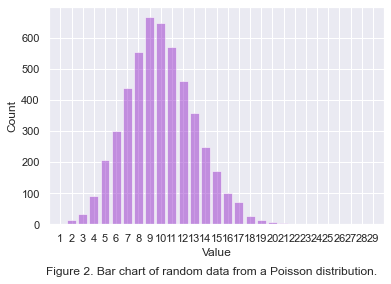

In [11]:
n += 1

plt.bar(bins[:max_val], hist, align='center', color = "#9932CC", alpha = 0.5)
plt.xticks(bins[:max_val])
plt.xlim(min_val - 1, max_val + 1)  
plt.xlabel('Value')
plt.ylabel('Count')
txt = f"Figure {n}. Bar chart of random data from a Poisson distribution."
plt.figtext(0.5, -0.05, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)

plt.show()

## 1.3 Binning and plotting degree distributions

The Erdös-Renyi network with parameters $N = 5000$ and $p = \frac{\langle k \rangle}{N-1} = \frac{10 }{5000-1}$ is generated and the degree distribution is extracted.

In [17]:
N = 5000
p = 10/(N-1)

# Create graph
G = nx.erdos_renyi_graph(N, p) 

# Extract degrees
degrees = [G.degree(n) for n in G.nodes()]

In [18]:
min_val = np.min(degrees) 
max_val = np.max(degrees)

v = range(min_val, max_val + 2) 
hist, bins = np.histogram(degrees, bins = v) 

The degree distribution is plotted below. 

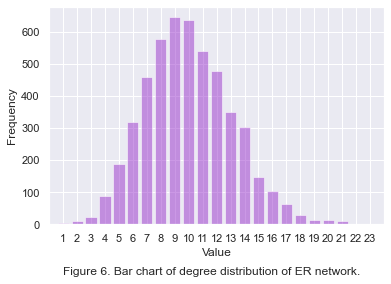

In [19]:
plt.figure(figsize = [6, 4])
n += 1

plt.bar(bins[:max_val], hist, align='center', color = "#9932CC", alpha = 0.5)
plt.xticks(bins[:max_val])
plt.xlim(min_val-1, max_val+1)  
plt.xlabel('Value')
plt.ylabel('Frequency')
txt = f"Figure {n}. Bar chart of degree distribution of ER network."
plt.figtext(0.5, -0.05, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)

plt.show()

Figure 3 looks very similar to Figure 2. Corresponds to the fact that for $N >> k$, the binomial (the exact form of the degree distribution of a random network) is well approximated by a Poisson distribution [[BaAl16](http://barabasi.com/networksciencebook/)].

# 2 Random networks and plotting in `networkx`

## 2.1 Network Science exercise 3.1

An Erdős-Rényi network with $N = 3000$ nodes, connected to each other with probability $p = 10^{-3}$ is considered. <br>

The expected number of links is $\langle L\rangle=\frac{p N(N-1)}{2}$ [[BaAl16](http://barabasi.com/networksciencebook/)].

In [39]:
N = 3000
p = 0.001

(p*N*(N-1))/2

4498.5

In [40]:
print(p)
print(1/N)

0.001
0.0003333333333333333


As $p>\frac{1}{N}$, the network is in the supercritical regime. 

The probability $p_c$ so the network is at the critical point is $p=1/N$.

In [41]:
pc = 1/N

Given $p=0.001$, the number og nodes $N^{cr}$ so that the network has only one component (has to fulfill $k>lnN^{cr}$) is found by solving: <br>
$k>lnN^{cr} =>$ <br>
$p(N^{cr}-1)>lnN^{cr}$ => <br>
$0.001(N-1)>lnN^{cr}$ <br>
giving $N^{cr}>9119.13$ so $N^{cr}=9120$.

The average degree is then  $\langle k^{cr}\rangle = p(N^{cr}-1)$

In [42]:
Ncr = 9120
kcr = p*(Ncr-1)

The average distance between 2 randomly chosen nodes is $\langle d\rangle \approx \frac{\ln N}{\ln \langle k\rangle}$

In [43]:
np.log(Ncr)/np.log(kcr)

4.12522144293705

The degree distribution of this network is

In [44]:
N = Ncr
p = kcr/(N-1)

# Create graph
G = nx.erdos_renyi_graph(N, p) 

# Extract degrees
degrees = [G.degree(n) for n in G.nodes()]

In [45]:
# Prepare plotting
min_val = np.min(degrees) 
max_val = np.max(degrees)
v = range(min_val, max_val + 2)
hist, bins = np.histogram(degrees, bins = v) 

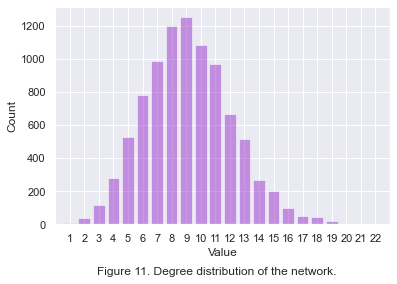

In [46]:
n += 1

plt.bar(bins[:max_val], hist, align='center', color = "#9932CC", alpha = 0.5)
plt.xticks(bins[:max_val])
plt.xlim(min_val - 1, max_val + 1)  
plt.xlabel('Value')
plt.ylabel('Count')
txt = f"Figure {n}. Degree distribution of the network."
plt.figtext(0.5, -0.05, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)

plt.show()

## 2.2 Paths

A random network with 200 nodes and an average degree of 1.5 is shown below. 

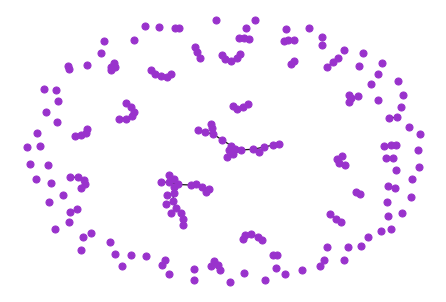

In [47]:
N = 200
k = 1.
p = k/(N-1)

G = nx.erdos_renyi_graph(N, p) 
nx.draw(G, node_color='#9932CC', node_size=50, with_labels=False, node_shape='o', edge_color='.1', width=1.3)

The Giant Connected Component is extracted.

In [48]:
GCC = sorted(nx.connected_components(G), key=len, reverse=True)[0]
GCC = G.subgraph(GCC)

A random node is chosen from the GCC. 

In [49]:
random_node = choice(list(GCC.nodes))

All nodes that are precisely 2 steps away from the random node are found. 

In [50]:
length = nx.single_source_shortest_path_length(GCC, random_node, 2)
length = {k:v for (k,v) in length.items() if v == 2}

The GCC is plotted with colors corresponding to starting node, nodes 2 steps away from the starting node, and the rest.

In [51]:
color_map = []
for node in GCC:
    if node == random_node:
        color_map.append("#000000")
    elif node in length.keys():
        color_map.append('#ff0000')
    else: 
        color_map.append('#A0CBE2')   

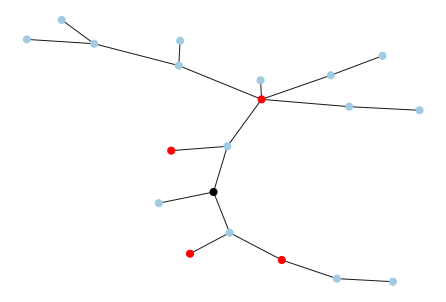

In [52]:
nx.draw_spring(GCC, node_color=color_map, node_size=50, with_labels=False, node_shape='o')

# 3 Watts-Strogatz Networks

## 3.1 Simple WS graphs

`nx.watts_strogatz_graph` is used to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1, \textrm{and}  1$. The average shortest path length $\langle d \rangle$ is calculated for each graph. 

In [53]:
N = 500
k = 4

for i, p in enumerate([0, 0.1, 1]):
    g = nx.watts_strogatz_graph(N, k, p)
    print(f"<d> when p = {p}: {round(nx.average_shortest_path_length(g),2)}")

<d> when p = 0: 62.88
<d> when p = 0.1: 7.47
<d> when p = 1: 4.77


When $p = 1$, all links have been rewired, and the network turns into a random network. 

## 3.2 Understanding the behaviour of the WS model

50 networks with $N = 500$, $\langle k \rangle = 4$, are generated for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$ and the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks is calculated. 

In [54]:
P = [0, 0.01, 0.03, 0.05, 0.1, 0.2]

std_tot = []
avg_tot = []

for i, p in enumerate(P):
    avg_path = []
    for i in range(50):
        g = nx.watts_strogatz_graph(N, k, p)
        avg_path.append(nx.average_shortest_path_length(g))
    avg_tot.append(np.mean(avg_path))
    std_tot.append(np.std(avg_path))

Below plot shows how the path length decreases very quickly with only a little fraction of re-wiring. 

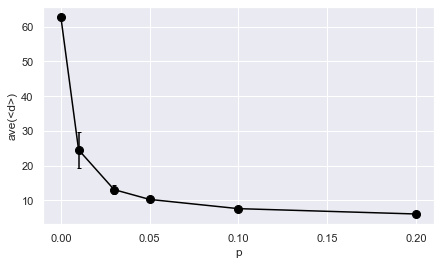

In [55]:
plt.rcParams["figure.figsize"] = (7,4)
(_, caps, _) = plt.errorbar(P, avg_tot, yerr=std_tot, fmt='o-', markersize=8, capsize=2, color='black')
plt.xlabel("p")
plt.ylabel("ave(<d>)")
plt.xticks(np.arange(0, 0.21, step=0.05))

for cap in caps:
    cap.set_markeredgewidth(1)

As $p$ increases, the average shortest path decreases, as does the standard deviation.  

# 4 The Barabasi-Albert Model

## 4.1 Creating a BA network

In this section, a 100 node BA network is created using a "homemade" BA model.

In [56]:
# Step 1: create a graph consisting of a single link 
G = nx.Graph()
G.add_edge(0, 1)

# Step 3: Keep going until you have a 100 node network 
for i in range(2,100):
    # Step 2a: add another node
    G.add_node(i)
    
    # Step 2b: connect newly added node to one of the existing nodes in proportion to their degree 
    regular_list = list(G.edges())
    flat_list = [item for sublist in regular_list for item in sublist]
    G.add_edge(i,choice(flat_list))

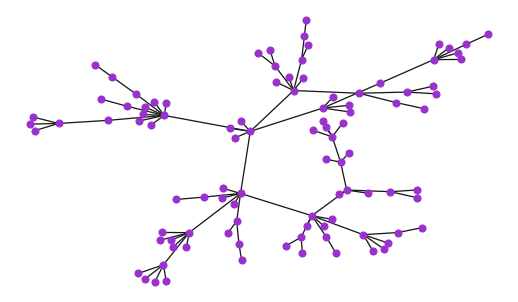

In [57]:
nx.draw_spring(G, node_color='#9932CC', node_size=50, with_labels=False, node_shape='o', edge_color='.1', width=1.3)

## 4.2  A 5000 node network

In [58]:
G = nx.Graph()
G.add_edge(0, 1)
for i in range(2, 5000):
    G.add_node(i)
    regular_list = list(G.edges())
    flat_list = [item for sublist in regular_list for item in sublist]
    G.add_edge(i,choice(flat_list))

In [59]:
print("Minimum degree:", np.min(G.degree))
print("Maximum degree:", np.max(G.degree))

Minimum degree: 0
Maximum degree: 4999


The degree distribution is binned using `collections.Counter` and plotted with  linear and log-log axes.

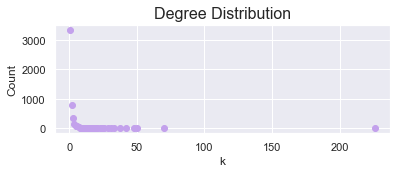

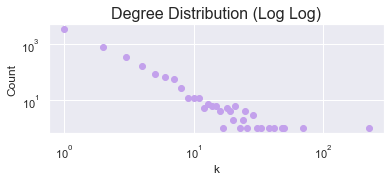

In [60]:
degree_sequence = sorted([d for n, d in G.degree()])  
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(figsize=(6,2))
plt.scatter(deg, cnt, color="#C3A1EC")
plt.title("Degree Distribution", fontsize=16)
plt.ylabel("Count", fontsize=12)
plt.xlabel("k", fontsize=12)

fig, ax = plt.subplots(figsize=(6,2))
plt.scatter(deg, cnt, color="#C3A1EC")
plt.xscale('log')
plt.yscale('log')
plt.title("Degree Distribution (Log Log)", fontsize=16)
plt.ylabel("Count", fontsize=12)
plt.xlabel("k", fontsize=12)

plt.show()

# 5 Power-laws and the friendship paradox

## 5.1 Exploring the friendship paradox 

In this section, the [Friendship paradox](https://en.wikipedia.org/wiki/Friendship_paradox) is explored. A random node is chosen from the network BA created above. 

In [61]:
count = 0

for i in range(1001):
    
    # Pick a random node
    random_node = choice(list(G.nodes))
    
    # Find its degree
    n_friends = G.degree[random_node]
    
    # Find its neighbors
    neighbors = list(G.neighbors(random_node))
    friend_n_friend = []
    
    # Calculate the friends' average degrees
    for k in range(0,len(neighbors)):
        friend_n_friend.append(G.degree[neighbors[k]])
        
    # Make comparison add to count if i's friends on average has more friends than i
    if len(neighbors) < np.mean(friend_n_friend):
        count = count+1
        
print(f"The friendship paradox is true {count} out of 1000 times.")

The friendship paradox is true 892 out of 1000 times.


## 5.2 Network using growth mechanism without the preferential attachment

A network of the same size and degree, using the growth mechanism without the preferential attachment is created. 

In [62]:
G = nx.Graph()
G.add_edge(0, 1)
for i in range(2, 5000):
    G.add_node(i)
    G.add_edge(i,choice(range(0,5000)))

In [63]:
print("Minimum degree:", np.min(G.degree))
print("Maximum degree:", np.max(G.degree))

Minimum degree: 0
Maximum degree: 4999


In [64]:
degrees = [G.degree(n) for n in G.nodes()]

In [65]:
min_val = np.min(degrees) 
max_val = np.max(degrees)

v = range(min_val, max_val + 2) 
hist, bins = np.histogram(degrees, bins = v) 

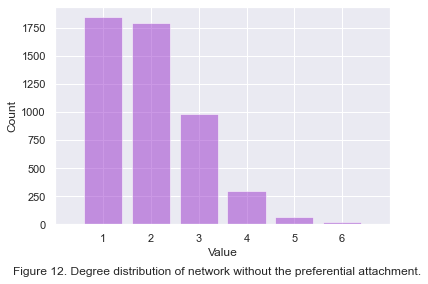

In [66]:
plt.figure(figsize = [6, 4])
n += 1

plt.bar(bins[:max_val], hist, align='center', color = "#9932CC", alpha = 0.5)
plt.xticks(bins[:max_val])
plt.xlim(min_val-1, max_val+1)  
plt.xlabel('Value')
plt.ylabel('Count')
txt = f"Figure {n}. Degree distribution of network without the preferential attachment."
plt.figtext(0.5, -0.05, txt, wrap = True, horizontalalignment = 'center', fontsize = 12)

plt.show()

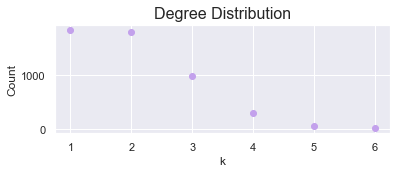

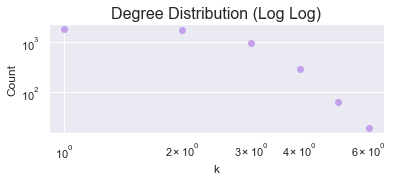

In [67]:
degree_sequence = sorted([d for n, d in G.degree()])  
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(figsize=(6,2))
plt.scatter(deg, cnt, color="#C3A1EC")
plt.title("Degree Distribution", fontsize=16)
plt.ylabel("Count", fontsize=12)
plt.xlabel("k", fontsize=12)

fig, ax = plt.subplots(figsize=(6,2))
plt.scatter(deg, cnt, color="#C3A1EC")
plt.xscale('log')
plt.yscale('log')
plt.title("Degree Distribution (Log Log)", fontsize=16)
plt.ylabel("Count", fontsize=12)
plt.xlabel("k", fontsize=12)

plt.show()

Comparing to the ER network of the same size and same p. 

In [72]:
N = 5000
p = np.mean(degrees)/(N-1)

# Create graph
G = nx.erdos_renyi_graph(N, p) 

# Extract degrees
degrees = [G.degree(n) for n in G.nodes()]

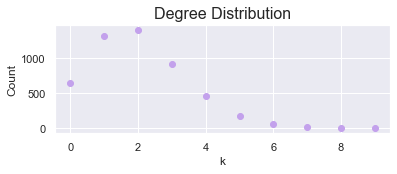

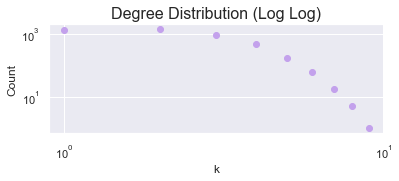

In [73]:
degree_sequence = sorted([d for n, d in G.degree()])  
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(figsize=(6,2))
plt.scatter(deg, cnt, color="#C3A1EC")
plt.title("Degree Distribution", fontsize=16)
plt.ylabel("Count", fontsize=12)
plt.xlabel("k", fontsize=12)

fig, ax = plt.subplots(figsize=(6,2))
plt.scatter(deg, cnt, color="#C3A1EC")
plt.xscale('log')
plt.yscale('log')
plt.title("Degree Distribution (Log Log)", fontsize=16)
plt.ylabel("Count", fontsize=12)
plt.xlabel("k", fontsize=12)

plt.show()

In [74]:
min_val = np.min(degrees) 
max_val = np.max(degrees)

v = range(min_val, max_val + 2) 
hist, bins = np.histogram(degrees, bins = v) 